# Chapter 5. Statistics

## 1). Describing a Single Set of Data

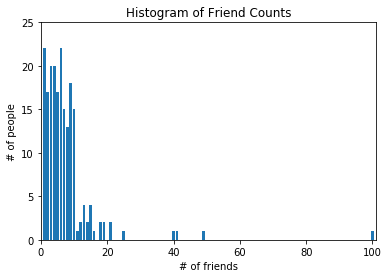

In [29]:
from collections import Counter
import matplotlib.pyplot as plt
num_friends = [100.0,49,41,40,25,21,21,19
               ,19,18,18,16,15,15,15,15,14,
               14,13,13,13,13,12,12,11,10,10,10,
               10,10,10,10,10,10,10,10,10,10,10,10,
               9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,
               8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,
               7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,
               5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,
               4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,
               2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,
               1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]

plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title('Histogram of Friend Counts')
plt.xlabel('# of friends')
plt.ylabel('# of people')
plt.show()

In [30]:
num_points = len(num_friends)
num_points

largest_value = max(num_friends)
smallest_value = min(num_friends)

print(largest_value)
print(smallest_value)

100.0
1


In [31]:
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]
second_smallest_value = sorted_values[1]
second_largest_value = sorted_values[-2]

### 1). Describing a Single Set of Data - [1]. Central Tendencies

In [32]:
# mean

from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)

7.333333333333333

In [33]:
# median

def _median_odd(xs: List[float]) -> float:
    """if the len(xs) is odd, the median is the middle element."""
    return sorted(xs)[len(xs)//2]

_median_odd([5,3,4,2,1])


def _median_even(xs: List[float]) -> float:
    """if the len(xs) is even, it's the average of middle two element."""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1,10,2,9,5]) == 5

print(median(num_friends))

6.0


In [34]:
def quantile(xs: List[float], p: float) -> float:
    """returns pth-percentile value in x."""
    p_index = int(p*len(xs))
    return sorted(xs)[p_index]

In [35]:
assert quantile(num_friends, 0.90) == 13

In [36]:
# mode

def mode(x: List[float]) -> List[float]:
    
    counts = Counter(x)
    max_count = max(counts.values())
    
    return [x for x,y in counts.items() if y is max_count]
    

assert(set(mode(num_friends)) == {1,6})

In [37]:
mode([1,1,1,1,6,6,6,6,12,2,2,3,4,2])

[1, 6]

### 1). Describing a Single Set of Data - [2]. Dispersion

In [10]:
#1. range
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

assert data_range(num_friends) == 99

In [11]:
#2. variance
import numpy as np
def de_mean(xs: List[float]) -> List[float]:
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    
    assert len(xs) >= 2
    
    n = len(xs)
    deviations = de_mean(xs)
    devis = np.array(deviations)
    devis = devis ** 2
    devis = np.sum(devis)/(len(devis)-1)
    
    return devis

In [12]:
assert 81.54 < variance(num_friends) < 81.55

In [13]:
#3. standard deviation
import math

def standard_deviation(xs : List[float]) -> float:
    return math.sqrt(variance(xs))

standard_deviation(num_friends)

9.030144736232474

In [14]:
print(mean(num_friends))
len(num_friends)

7.333333333333333


204

In [15]:
def interquartile_range(xs: List) -> float:
    return quantile(xs, 0.75) - quantile(xs, 0.25)

median(num_friends)

print(quantile(num_friends, 0.75))
print(quantile(num_friends, 0.25))
print(min(num_friends))
print(max(num_friends))

9
3
1
100.0


## 2). Correlation

In [18]:
# 1). covariance
from scratch.linear_algebra import dot

def covariance(xs: List[float], ys: List[float]) -> float:
    
    # dimension matching :
    assert len(xs) == len(ys)
    
    # return dot product / n - 1
    return dot(de_mean(xs), de_mean(ys))/(len(xs)-1)


In [22]:
# add daily_minutes data
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [23]:
covariance(num_friends, daily_minutes)

22.425435139573064

In [53]:
# 2). pearson corr.
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures [how much xs and ys] vary [in tandom] near their means.""" 
    
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    
    if stdev_x > 0 and stdev_y > 0 :
        return covariance(xs,ys)/stdev_x/stdev_y # z-score 사각형 넓이의 평균 ish => (n-1)로 나눈 것.
    else:
        return 0
    
correlation(num_friends, daily_minutes)

0.2473695736647822

In [54]:
correlation(num_friends, daily_minutes)

0.2473695736647822

In [55]:
# pearson corr is highly affected by outliers.

outlier = num_friends.index(100)

In [56]:
num_friends_good = [x for i,x in enumerate(num_friends) if i != outlier]

In [57]:
daily_minutes_good = [x for i,x in enumerate(daily_minutes) if i != outlier]

In [58]:
daily_hours_good = [dm / 60 for dm in daily_minutes_good]

In [59]:
correlation(num_friends_good, daily_minutes_good)
correlation(num_friends_good, daily_hours_good)

0.5736792115665601

In [60]:
35*5.1 - 2.7*66

0.29999999999998295

In [71]:
x = [-2, -1, -1, 0, 1, 1, 2]
y = [-2, -2, -1, 0, 1, 2, 2]

b1 = correlation(x,y)*standard_deviation(y)/standard_deviation(x)

standard_deviation(y)/standard_deviation(x)
correlation(x,y)

0.9525793444156804

In [73]:
import math
std = math.sqrt(0.35 * 0.65/100)
p = 0.65

print(p)
print(std)

0.65 + 2*0.047

0.65
0.047696960070847276


0.744